In [13]:
import os
import matplotlib.pyplot as plt

import csv

#item name
INCIDENT_ID = 0
DATE = 1
STATE = 2
CITY_OR_COUNTY = 3
ADDRESS = 4
N_KILLED = 5
N_INJURED = 6
INCIDENT_URL = 7
SOURCE_URL = 8
INCIDENT_URL_FIELDS_MISSING = 9
CONGRESSIONAL_DISTRICT = 10
GUN_STOLEN = 11
GUN_TYPE = 12
INCIDENT_CHARACTERISTICS = 13
LATITUDE = 14
LOCATION_DESCRIPTION = 15
LONGITUDE = 16
N_GUNS_INVOLVED = 17
NOTES = 18
PARTICIPANT_AGE = 19
PARTICIPANT_AGE_GROUP = 20
PARTICIPANT_GENDER = 21
PARTICIPANT_NAME = 22
PARTICIPANT_RELATIONSHIP = 23
PARTICIPANT_STATUS = 24
PARTICIPANT_TYPE = 25
SOURCES = 26
STATE_HOUSE_DISTRICT = 27
STATE_SENATE_DISTRICT = 28

csv_file = open('./stage3.csv','r')
csv_reader = csv.reader(csv_file)
data = []
for row in csv_reader:
    data.append(row)
csv_file.close()

head = data[0]
data = data[1:]


In [3]:
train_set = []
test_set = []
print(data[0])
print(len(data[0]))
for row in data:
    if len(row) <=1:
        continue
    if "2018" in row[DATE]:
        test_set.append(row)
    else:
        train_set.append(row)
print(train_set[123][DATE]) 
print(test_set[1234][DATE])

['461105', '2013-01-01', 'Pennsylvania', 'Mckeesport', '1506 Versailles Avenue and Coursin Street', '0', '4', 'http://www.gunviolencearchive.org/incident/461105', 'http://www.post-gazette.com/local/south/2013/01/17/Man-arrested-in-New-Year-s-Eve-shooting-in-McKeesport/stories/201301170275', 'False', '14', '', '', 'Shot - Wounded/Injured||Mass Shooting (4+ victims injured or killed excluding the subject/suspect/perpetrator, one location)||Possession (gun(s) found during commission of other crimes)||Possession of gun by felon or prohibited person', '40.3467', '', '-79.8559', '', 'Julian Sims under investigation: Four Shot and Injured', '0::20', '0::Adult 18+||1::Adult 18+||2::Adult 18+||3::Adult 18+||4::Adult 18+', '0::Male||1::Male||3::Male||4::Female', '0::Julian Sims', '', '0::Arrested||1::Injured||2::Injured||3::Injured||4::Injured', '0::Victim||1::Victim||2::Victim||3::Victim||4::Subject-Suspect', 'http://pittsburgh.cbslocal.com/2013/01/01/4-people-shot-in-mckeesport/||http://www.wt

In [5]:
print(len(train_set))
print(len(test_set))

225875
13802


In [6]:
# year
# training set does not include 2018
_2013 = []
_2014 = []
_2015 = []
_2016 = []
_2017 = []
_2018 = []

# months
_01 = []
_02 = []
_03 = []
_04 = []
_05 = []
_06 = []
_07 = []
_08 = []
_09 = []
_10 = []
_11 = []
_12 = []
months = [_01, _02, _03, _04, _05, _06, _07, _08, _09, _10, _11, _12]

for x in train_set:
    date = x[DATE]
    if '2013' in date:
        _2013.append(x)
    elif '2014' in date:
        _2014.append(x)
    elif '2015' in date:
        _2015.append(x)
    elif '2016' in date:
        _2016.append(x)
    elif '2017' in date:
        _2017.append(x)
    elif '2018' in date:
        _2018.append(x)
    
    if '-01-' in date:
        _01.append(x)
    if '-02-' in date:
        _02.append(x)
    if '-03-' in date:
        _03.append(x)
    if '-04-' in date:
        _04.append(x)
    if '-05-' in date:
        _05.append(x)
    if '-06-' in date:
        _06.append(x)
    if '-07-' in date:
        _07.append(x)
    if '-08-' in date:
        _08.append(x)
    if '-09-' in date:
        _09.append(x)
    if '-10-' in date:
        _10.append(x)
    if '-11-' in date:
        _11.append(x)
    if '-12-' in date:
        _12.append(x)


print('number of records of 2013:', len(_2013))
print('number of records of 2014:', len(_2014))
print('number of records of 2015:', len(_2015))
print('number of records of 2016:', len(_2016))
print('number of records of 2017:', len(_2017))
print('number of records of 2018:', len(_2018))


number of records of 2013: 278
number of records of 2014: 51854
number of records of 2015: 53579
number of records of 2016: 58763
number of records of 2017: 61401
number of records of 2018: 0


In [7]:
# year of nkill

N_KILLED_2013, N_KILLED_2014, N_KILLED_2015, N_KILLED_2016, N_KILLED_2017, N_KILLED_2018 = 0, 0, 0, 0, 0, 0;

for x in _2013:
    N_KILLED_2013 += int(x[N_KILLED])
for x in _2014:
    N_KILLED_2014 += int(x[N_KILLED])
for x in _2015:
    N_KILLED_2015 += int(x[N_KILLED])
for x in _2016:
    N_KILLED_2016 += int(x[N_KILLED])
for x in _2017:
    N_KILLED_2017 += int(x[N_KILLED])
# for x in _2018:
#    N_KILLED_2018 += int(x[N_KILLED])

print('people killed in 2013:', N_KILLED_2013)
print('people killed in 2014:', N_KILLED_2014)
print('people killed in 2015:', N_KILLED_2015)
print('people killed in 2016:', N_KILLED_2016)
print('people killed in 2017:', N_KILLED_2017)
# print('people killed in 2018(to 3/31):', N_KILLED_2018)
print()

people killed in 2013: 317
people killed in 2014: 12557
people killed in 2015: 13484
people killed in 2016: 15066
people killed in 2017: 15511



In [121]:
# function to scan months
def scan_months(year, month_list):
    for x in year:
        if '-01-' in x[DATE]:
            month_list[0] += int(x[N_KILLED])
        elif '-02-' in x[DATE]:
            month_list[1] += int(x[N_KILLED])
        elif '-03-' in x[DATE]:
            month_list[2]  += int(x[N_KILLED])
        elif '-04-' in x[DATE]:
            month_list[3]  += int(x[N_KILLED])
        elif '-05-' in x[DATE]:
            month_list[4] += int(x[N_KILLED])
        elif '-06-' in x[DATE]:
            month_list[5] += int(x[N_KILLED])
        elif '-07-' in x[DATE]:
            month_list[6] += int(x[N_KILLED])
        elif '-08-' in x[DATE]:
            month_list[7]  += int(x[N_KILLED])
        elif '-09-' in x[DATE]:
            month_list[8] += int(x[N_KILLED])
        elif '-10-' in x[DATE]:
            month_list[9] += int(x[N_KILLED])
        elif '-11-' in x[DATE]:
            month_list[10] += int(x[N_KILLED])
        elif '-12-' in x[DATE]:
            month_list[11] += int(x[N_KILLED])

In [44]:
month_names = ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec']

people killed in January: 4711
people killed in February: 3854
people killed in March: 4523
people killed in April: 4383
people killed in May: 4830
people killed in June: 4886
people killed in July: 5276
people killed in August: 5127
people killed in September: 4779
people killed in October: 4791
people killed in November: 4848
people killed in December: 4927


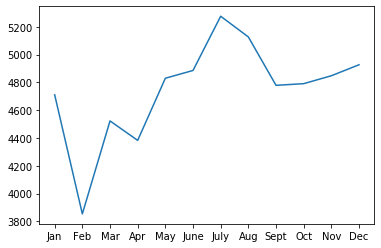

In [46]:
# each month of n killed in training dataset

months_all = [0] * 12
scan_months(train_set, months_all)

print('people killed in January:', months_all[0])
print('people killed in February:', months_all[1])
print('people killed in March:', months_all[2])
print('people killed in April:', months_all[3])
print('people killed in May:', months_all[4])
print('people killed in June:', months_all[5])
print('people killed in July:', months_all[6])
print('people killed in August:', months_all[7])
print('people killed in September:', months_all[8])
print('people killed in October:', months_all[9])
print('people killed in November:', months_all[10])
print('people killed in December:', months_all[11])

# all
plt.plot(month_names, months_all)
plt.show()

[23, 14, 25, 26, 20, 25, 31, 35, 37, 26, 26, 29]


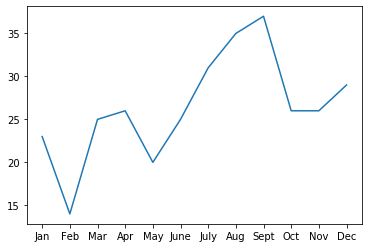

In [169]:
months_2013 = [0,0,0,0,0,0,0,0,0,0,0,0]
scan_months(_2013, months_2013)

print(months_2013)

 # 2013
plt.plot(month_names, months_2013)
plt.show()


[1070, 845, 1007, 979, 1099, 1127, 1162, 1140, 1013, 1012, 1017, 1086]


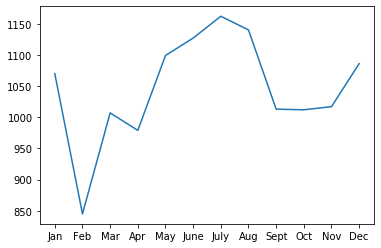

In [170]:
months_2014 = [0,0,0,0,0,0,0,0,0,0,0,0]
scan_months(_2014, months_2014)
print(months_2014)
 # 2014
plt.plot(month_names, months_2014)
plt.show()

[1123, 870, 1090, 995, 1164, 1092, 1293, 1199, 1247, 1092, 1133, 1186]


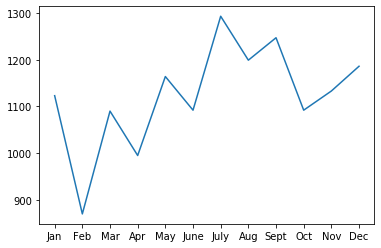

In [171]:
months_2015 = [0,0,0,0,0,0,0,0,0,0,0,0]
scan_months(_2015, months_2015)
print(months_2015)
 # 2015
plt.plot(month_names, months_2015)
plt.show()

[1139, 984, 1181, 1152, 1158, 1276, 1399, 1429, 1286, 1356, 1368, 1338]


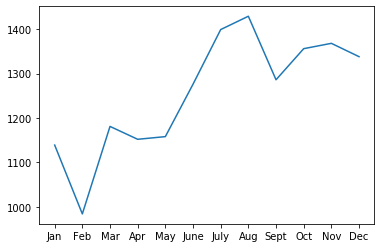

In [172]:
months_2016 = [0,0,0,0,0,0,0,0,0,0,0,0]
scan_months(_2016, months_2016)
print(months_2016)
 # 2016
plt.plot(month_names, months_2016)
plt.show()

[1356, 1141, 1220, 1231, 1389, 1366, 1391, 1324, 1196, 1305, 1304, 1288]


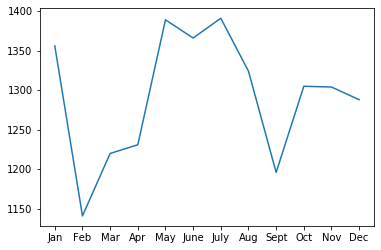

In [173]:
months_2017 = [0,0,0,0,0,0,0,0,0,0,0,0]
scan_months(_2017, months_2017)
print(months_2017)
 # 2017
plt.plot(month_names, months_2017)
plt.show()

In [38]:
Texas_data = []
texas_count = 0
count = []
for row in data:
    if row[STATE] == 'Texas':
        Texas_data.append(row)
for row in Texas_data:
    if row[N_KILLED] != None:
        texas_count += int(row[N_INJURED])
print('Texas: ' + str(texas_count))
count.append(texas_count)


Alab_data = []
Alab_count = 0
for row in data:
    if row[STATE] == 'Alabama':
        Alab_data.append(row)
for row in Alab_data:
    if row[N_KILLED] != None:
        Alab_count += int(row[N_INJURED])
print('Alab: ' + str(Alab_count))
count.append(Alab_count)

Alaska_data = []
Alaska_count = 0
for row in data:
    if row[STATE] == 'Alaska':
        Alaska_data.append(row)
for row in Alaska_data:
    if row[N_KILLED] != None:
        Alaska_count += int(row[N_INJURED])
print('Alaska: ' + str(Alaska_count))
count.append(Alaska_count)

Ari_data = []
Ari_count = 0
for row in data:
    if row[STATE] == 'Arizona':
        Ari_data.append(row)
for row in Ari_data:
    if row[N_KILLED] != None:
        Ari_count += int(row[N_INJURED])
print('Arizona: ' + str(Ari_count))
count.append(Ari_count)

Ark_data = []
Ark_count = 0
for row in data:
    if row[STATE] == 'Arkansas':
        Ark_data.append(row)
for row in Ark_data:
    if row[N_KILLED] != None:
        Ark_count += int(row[N_INJURED])
print('Arkansas: ' + str(Ari_count))
count.append(Ark_count)

Ca_data = []
Ca_count = 0
for row in data:
    if row[STATE] == 'California':
        Ca_data.append(row)
for row in Ca_data:
    if row[N_KILLED] != None:
        Ca_count += int(row[N_INJURED])
print('California: ' + str(Ca_count))
count.append(Ca_count)

Colo_data = []
Colo_count = 0
for row in data:
    if row[STATE] == 'Colorado':
        Colo_data.append(row)
for row in Colo_data:
    if row[N_KILLED] != None:
        Colo_count += int(row[N_INJURED])
print('Colorado: ' + str(Colo_count))
count.append(Colo_count)

Conn_data = []
Conn_count = 0
for row in data:
    if row[STATE] == 'Connecticut':
        Conn_data.append(row)
for row in Conn_data:
    if row[N_KILLED] != None:
        Conn_count += int(row[N_INJURED])
print('Connecticut: ' + str(Conn_count))
count.append(Conn_count)

Dela_data = []
Dela_count = 0
for row in data:
    if row[STATE] == 'Delaware':
        Dela_data.append(row)
for row in Dela_data:
    if row[N_KILLED] != None:
        Dela_count += int(row[N_INJURED])
print('Delaware: ' + str(Dela_count))
count.append(Dela_count)

Florida_data = []
Florida_count = 0
for row in data:
    if row[STATE] == 'Florida':
        Florida_data.append(row)
for row in Florida_data:
    if row[N_KILLED] != None:
        Florida_count += int(row[N_INJURED])
print('Florida: ' + str(Florida_count))
count.append(Florida_count)

Georgia_data = []
Georgia_count = 0
for row in data:
    if row[STATE] == 'Georgia':
        Georgia_data.append(row)
for row in Georgia_data:
    if row[N_KILLED] != None:
        Georgia_count += int(row[N_INJURED])
print('Georgia: ' + str(Georgia_count))
count.append(Georgia_count)

Hawaii_data = []
Hawaii_count = 0
for row in data:
    if row[STATE] == 'Hawaii':
        Hawaii_data.append(row)
for row in Hawaii_data:
    if row[N_KILLED] != None:
        Hawaii_count += int(row[N_INJURED])
print('Hawaii: ' + str(Hawaii_count))
count.append(Hawaii_count)

Idaho_data = []
Idaho_count = 0
for row in data:
    if row[STATE] == 'Idaho':
        Idaho_data.append(row)
for row in Idaho_data:
    if row[N_KILLED] != None:
        Idaho_count += int(row[N_INJURED])
print('Idaho: ' + str(Idaho_count))
count.append(Idaho_count)


Illinois_data = []
Illinois_count = 0
for row in data:
    if row[STATE] == 'Illinois':
        Illinois_data.append(row)
for row in Illinois_data:
    if row[N_KILLED] != None:
        Illinois_count += int(row[N_INJURED])
print('Illinois: ' + str(Illinois_count))
count.append(Illinois_count)

Indiana_data = []
Indiana_count = 0
for row in data:
    if row[STATE] == 'Indiana':
        Indiana_data.append(row)
for row in Indiana_data:
    if row[N_KILLED] != None:
        Indiana_count += int(row[N_INJURED])
print('Indiana: ' + str(Indiana_count))
count.append(Indiana_count)

Iowa_data = []
Iowa_count = 0
for row in data:
    if row[STATE] == 'Iowa':
        Iowa_data.append(row)
for row in Iowa_data:
    if row[N_KILLED] != None:
        Iowa_count += int(row[N_INJURED])
print('Iowa: ' + str(Iowa_count))
count.append(Iowa_count)

Kansas_data = []
Kansas_count = 0
for row in data:
    if row[STATE] == 'Kansas':
        Kansas_data.append(row)
for row in Kansas_data:
    if row[N_KILLED] != None:
        Kansas_count += int(row[N_INJURED])
print('Kansas: ' + str(Kansas_count))
count.append(Kansas_count)

Kentucky_data = []
Kentucky_count = 0
for row in data:
    if row[STATE] == 'Kentucky':
        Kentucky_data.append(row)
for row in Kentucky_data:
    if row[N_KILLED] != None:
        Kentucky_count += int(row[N_INJURED])
print('Kentucky: ' + str(Kentucky_count))
count.append(Kentucky_count)

Louisiana_data = []
Louisiana_count = 0
for row in data:
    if row[STATE] == 'Louisiana':
        Louisiana_data.append(row)
for row in Louisiana_data:
    if row[N_KILLED] != None:
        Louisiana_count += int(row[N_INJURED])
print('Louisiana: ' + str(Louisiana_count))
count.append(Louisiana_count)

Maine_data = []
Maine_count = 0
for row in data:
    if row[STATE] == 'Maine':
        Maine_data.append(row)
for row in Maine_data:
    if row[N_KILLED] != None:
        Maine_count += int(row[N_INJURED])
print('Maine: ' + str(Maine_count))
count.append(Maine_count)

Maryland_data = []
Maryland_count = 0
for row in data:
    if row[STATE] == 'Maryland':
        Maryland_data.append(row)
for row in Maryland_data:
    if row[N_KILLED] != None:
        Maryland_count += int(row[N_INJURED])
print('Maryland: ' + str(Maryland_count))
count.append(Maryland_count)

Massachusetts_data = []
Massachusetts_count = 0
for row in data:
    if row[STATE] == 'Massachusetts':
        Massachusetts_data.append(row)
for row in Massachusetts_data:
    if row[N_KILLED] != None:
        Massachusetts_count += int(row[N_INJURED])
print('Massachusetts: ' + str(Massachusetts_count))
count.append(Massachusetts_count)

Michigan_data = []
Michigan_count = 0
for row in data:
    if row[STATE] == 'Michigan':
        Michigan_data.append(row)
for row in Michigan_data:
    if row[N_KILLED] != None:
        Michigan_count += int(row[N_INJURED])
print('Michigan: ' + str(Michigan_count))
count.append(Michigan_count)

Minnesota_data = []
Minnesota_count = 0
for row in data:
    if row[STATE] == 'Minnesota':
        Minnesota_data.append(row)
for row in Minnesota_data:
    if row[N_KILLED] != None:
        Minnesota_count += int(row[N_INJURED])
print('Minnesota: ' + str(Minnesota_count))
count.append(Minnesota_count)

Mississippi_data = []
Mississippi_count = 0
for row in data:
    if row[STATE] == 'Mississippi':
        Mississippi_data.append(row)
for row in Mississippi_data:
    if row[N_KILLED] != None:
        Mississippi_count += int(row[N_INJURED])
print('Mississippi: ' + str(Mississippi_count))
count.append(Mississippi_count)

Missouri_data = []
Missouri_count = 0
for row in data:
    if row[STATE] == 'Missouri':
        Missouri_data.append(row)
for row in Missouri_data:
    if row[N_KILLED] != None:
        Missouri_count += int(row[N_INJURED])
print('Missouri: ' + str(Missouri_count))
count.append(Missouri_count)

Montana_data = []
Montana_count = 0
for row in data:
    if row[STATE] == 'Montana':
        Montana_data.append(row)
for row in Montana_data:
    if row[N_KILLED] != None:
        Montana_count += int(row[N_INJURED])
print('Montana: ' + str(Montana_count))
count.append(Montana_count)

Nebraska_data = []
Nebraska_count = 0
for row in data:
    if row[STATE] == 'Nebraska':
        Nebraska_data.append(row)
for row in Nebraska_data:
    if row[N_KILLED] != None:
        Nebraska_count += int(row[N_INJURED])
print('Nebraska: ' + str(Nebraska_count))
count.append(Nebraska_count)

Nevada_data = []
Nevada_count = 0
for row in data:
    if row[STATE] == 'Nevada':
        Nevada_data.append(row)
for row in Nevada_data:
    if row[N_KILLED] != None:
        Nevada_count += int(row[N_INJURED])
print('Nevada: ' + str(Nevada_count))
count.append(Nevada_count)

NewHampshire_data = []
NewHampshire_count = 0
for row in data:
    if row[STATE] == 'New Hampshire':
        NewHampshire_data.append(row)
for row in NewHampshire_data:
    if row[N_KILLED] != None:
        NewHampshire_count += int(row[N_INJURED])
print('New Hampshire: ' + str(NewHampshire_count))
count.append(NewHampshire_count)

NewJersey_data = []
NewJersey_count = 0
for row in data:
    if row[STATE] == 'New Jersey':
        NewJersey_data.append(row)
for row in NewJersey_data:
    if row[N_KILLED] != None:
        NewJersey_count += int(row[N_INJURED])
print('New Jersey: ' + str(NewJersey_count))
count.append(NewJersey_count)

NewMexico_data = []
NewMexico_count = 0
for row in data:
    if row[STATE] == 'New Mexico':
        NewMexico_data.append(row)
for row in NewMexico_data:
    if row[N_KILLED] != None:
        NewMexico_count += int(row[N_INJURED])
print('NewMexico: ' + str(NewMexico_count))
count.append(NewMexico_count)

NY_data = []
NY_count = 0
for row in data:
    if row[STATE] == 'New York':
        NY_data.append(row)
for row in NY_data:
    if row[N_KILLED] != None:
        NY_count += int(row[N_INJURED])
print('NY: ' + str(NY_count))
count.append(NY_count)

NC_data = []
NC_count = 0
for row in data:
    if row[STATE] == 'North Carolina':
        NC_data.append(row)
for row in NC_data:
    if row[N_KILLED] != None:
        NC_count += int(row[N_INJURED])
print('NC: ' + str(NC_count))
count.append(NC_count)

ND_data = []
ND_count = 0
for row in data:
    if row[STATE] == 'North Dakota':
        ND_data.append(row)
for row in ND_data:
    if row[N_KILLED] != None:
        ND_count += int(row[N_INJURED])
print('ND: ' + str(ND_count))
count.append(ND_count)

Ohio_data = []
Ohio_count = 0
for row in data:
    if row[STATE] == 'Ohio':
        Ohio_data.append(row)
for row in Ohio_data:
    if row[N_KILLED] != None:
        Ohio_count += int(row[N_INJURED])
print('Ohio: ' + str(Ohio_count))
count.append(Ohio_count)

Oklahoma_data = []
Oklahoma_count = 0
for row in data:
    if row[STATE] == 'Oklahoma':
        Oklahoma_data.append(row)
for row in Oklahoma_data:
    if row[N_KILLED] != None:
        Oklahoma_count += int(row[N_INJURED])
print('Oklahoma: ' + str(Oklahoma_count))
count.append(Oklahoma_count)

Oregon_data = []
Oregon_count = 0
for row in data:
    if row[STATE] == 'Oregon':
        Oregon_data.append(row)
for row in Oregon_data:
    if row[N_KILLED] != None:
        Oregon_count += int(row[N_INJURED])
print('Oregon: ' + str(Oregon_count))
count.append(Oregon_count)

Pennsylvania_data = []
Pennsylvania_count = 0
for row in data:
    if row[STATE] == 'Pennsylvania':
        Pennsylvania_data.append(row)
for row in Pennsylvania_data:
    if row[N_KILLED] != None:
        Pennsylvania_count += int(row[N_INJURED])
print('Pennsylvania: ' + str(Pennsylvania_count))
count.append(Pennsylvania_count)

RI_data = []
RI_count = 0
for row in data:
    if row[STATE] == 'Rhode Island':
        RI_data.append(row)
for row in RI_data:
    if row[N_KILLED] != None:
        RI_count += int(row[N_INJURED])
print('RI: ' + str(RI_count))
count.append(RI_count)

SC_data = []
SC_count = 0
for row in data:
    if row[STATE] == 'South Carolina':
        SC_data.append(row)
for row in SC_data:
    if row[N_KILLED] != None:
        SC_count += int(row[N_INJURED])
print('SC: ' + str(SC_count))
count.append(SC_count)

SouthDakota_data = []
SouthDakota_count = 0
for row in data:
    if row[STATE] == 'South Dakota':
        SouthDakota_data.append(row)
for row in SouthDakota_data:
    if row[N_KILLED] != None:
        SouthDakota_count += int(row[N_INJURED])
print('South Dakota: ' + str(SouthDakota_count))
count.append(SouthDakota_count)

Tennessee_data = []
Tennessee_count = 0
for row in data:
    if row[STATE] == 'Tennessee':
        Tennessee_data.append(row)
for row in Tennessee_data:
    if row[N_KILLED] != None:
        Tennessee_count += int(row[N_INJURED])
print('Tennessee: ' + str(Tennessee_count))
count.append(Tennessee_count)

Utah_data = []
Utah_count = 0
for row in data:
    if row[STATE] == 'Utah':
        Utah_data.append(row)
for row in Utah_data:
    if row[N_KILLED] != None:
        Utah_count += int(row[N_INJURED])
print('Utah: ' + str(Utah_count))
count.append(Utah_count)

Vermont_data = []
Vermont_count = 0
for row in data:
    if row[STATE] == 'Vermont':
        Vermont_data.append(row)
for row in Vermont_data:
    if row[N_KILLED] != None:
        Vermont_count += int(row[N_INJURED])
print('Vermont: ' + str(Vermont_count))
count.append(Vermont_count)

Virginia_data = []
Virginia_count = 0
for row in data:
    if row[STATE] == 'Virginia':
        Virginia_data.append(row)
for row in Virginia_data:
    if row[N_KILLED] != None:
        Virginia_count += int(row[N_INJURED])
print('Virginia: ' + str(Virginia_count))
count.append(Virginia_count)

Washington_data = []
Washington_count = 0
for row in data:
    if row[STATE] == 'Washington':
        Washington_data.append(row)
for row in Washington_data:
    if row[N_KILLED] != None:
        Washington_count += int(row[N_INJURED])
print('Washington: ' + str(Washington_count))
count.append(Washington_count)

WestVirginia_data = []
WestVirginia_count = 0
for row in data:
    if row[STATE] == 'West Virginia':
        WestVirginia_data.append(row)
for row in WestVirginia_data:
    if row[N_KILLED] != None:
        WestVirginia_count += int(row[N_INJURED])
print('West Virginia: ' + str(WestVirginia_count))
count.append(WestVirginia_count)

Wisconsin_data = []
Wisconsin_count = 0
for row in data:
    if row[STATE] == 'Wisconsin':
        Wisconsin_data.append(row)
for row in Wisconsin_data:
    if row[N_KILLED] != None:
        Wisconsin_count += int(row[N_INJURED])
print('Wisconsin: ' + str(Wisconsin_count))
count.append(Wisconsin_count)

Wyoming_data = []
Wyoming_count = 0
for row in data:
    if row[STATE] == 'Wyoming':
        Wyoming_data.append(row)
for row in Wyoming_data:
    if row[N_KILLED] != None:
        Wyoming_count += int(row[N_INJURED])
print('Wyoming: ' + str(Wyoming_count))
count.append(Wyoming_count)


Texas: 6106
Alab: 2998
Alaska: 325
Arizona: 1096
Arkansas: 1096
California: 7644
Colorado: 1133
Connecticut: 1258
Delaware: 853
Florida: 7072
Georgia: 4056
Hawaii: 85
Idaho: 149
Illinois: 13514
Indiana: 2956
Iowa: 821
Kansas: 931
Kentucky: 1894
Louisiana: 4398
Maine: 132
Maryland: 3167
Massachusetts: 1701
Michigan: 2990
Minnesota: 916
Mississippi: 1883
Missouri: 3585
Montana: 136
Nebraska: 674
Nevada: 951
New Hampshire: 144
New Jersey: 2540
NewMexico: 543
NY: 5059
NC: 4629
ND: 130
Ohio: 5703
Oklahoma: 1550
Oregon: 694
Pennsylvania: 5056
RI: 346
SC: 3084
South Dakota: 114
Tennessee: 4478
Utah: 402
Vermont: 73
Virginia: 3566
Washington: 1287
West Virginia: 649
Wisconsin: 2117
Wyoming: 52


### Each state's months. 50 states * 12 months

In [39]:
states = [Texas_data, Alab_data, Alaska_data, Ari_data, Ark_data, Ca_data,
         Colo_data, Conn_data, Dela_data, Florida_data, Georgia_data,
         Hawaii_data, Idaho_data, Illinois_data, Indiana_data, Iowa_data,
         Kansas_data, Kentucky_data, Louisiana_data, Maine_data, Maryland_data,
         Massachusetts_data, Michigan_data, Minnesota_data, Mississippi_data, 
         Missouri_data, Montana_data, Nebraska_data, Nevada_data, NewHampshire_data, 
         NewJersey_data, NewMexico_data, NY_data, NC_data, ND_data, Ohio_data,
         Oklahoma_data, Oregon_data, Pennsylvania_data, RI_data, SC_data,
         SouthDakota_data, Tennessee_data, Utah_data, Vermont_data, Virginia_data,
         Washington_data, WestVirginia_data, Wisconsin_data, Wyoming_data]

len(states)

50

In [139]:
state_names = ['Texas','Alabama','Alaska','Arizona','Arkansas','California',
               'Colorado','Connecticut','Delaware','Florida','Georgia',
               'Hawaii','Idaho','Illinois','Indiana','Iowa',
               'Kansas','Kentucky','Louisiana','Maine','Maryland',
               'Massachusetts','Michigan','Minnesota','Mississippi',
               'Missouri','Montana','Nebraska','Nevada','New Hampshire',
               'New Jersey','New Mexico','New York','North Carolina','North Dakota','Ohio',
               'Oklahoma','Oregon','Pennsylvania','Rhode Island','South Carolina',
               'South Dakota','Tennessee','Utah','Vermont','Virginia',
               'Washington','West Virginia','Wisconsin','Wyoming']

In [140]:
def scan_months_states(states, state_names):
    states_months = {}
    for i in range(50):
        state = states[i]
        state_name = state_names[i]
        state_months = [0] * 12
        scan_months(state, state_months)
        states_months[state_name] = state_months
        plt.plot(month_names, state_months)
        plt.title(state_name)
        plt.ylabel('Deaths')
        plt.show()
    return states_months

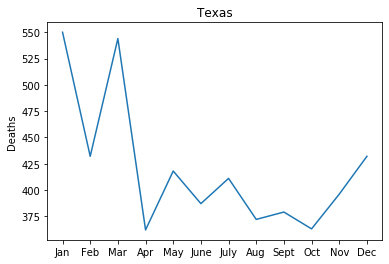

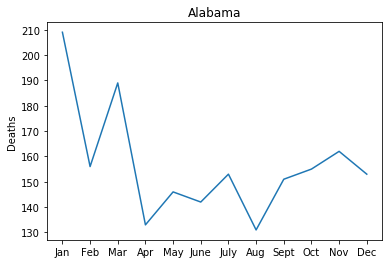

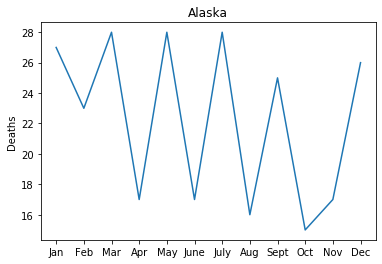

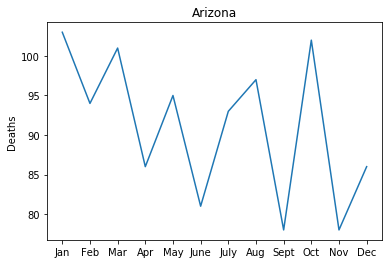

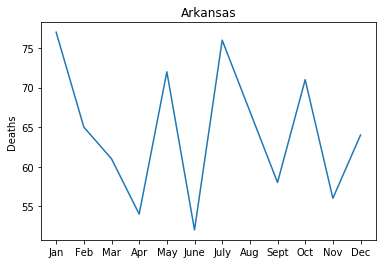

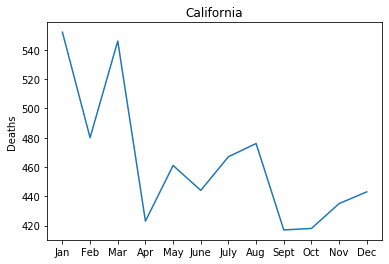

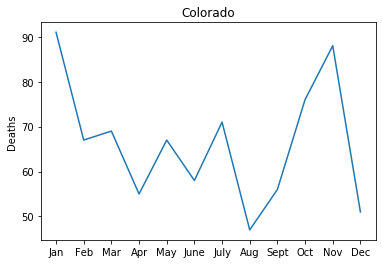

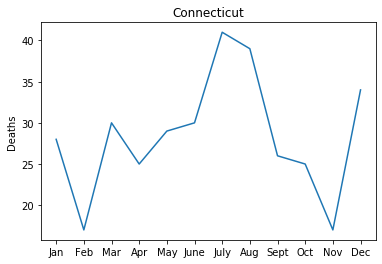

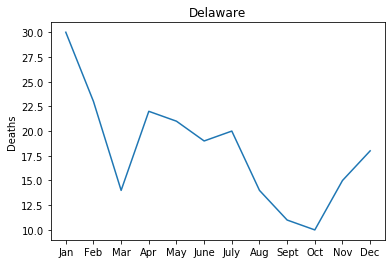

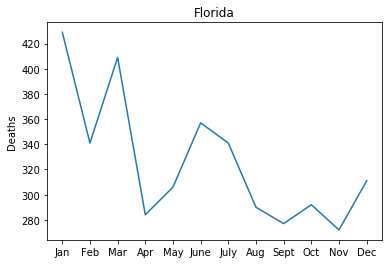

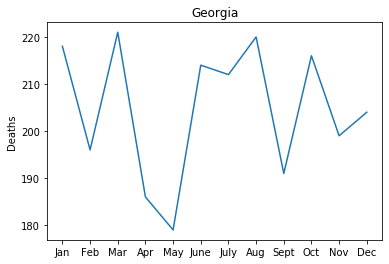

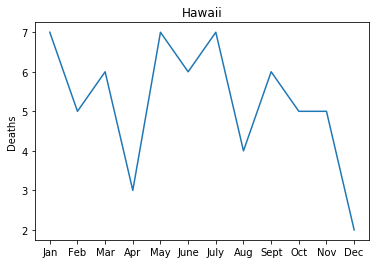

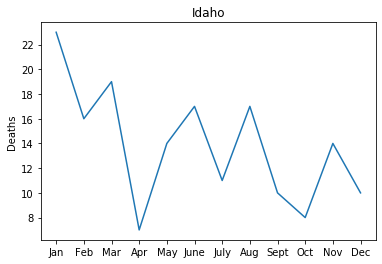

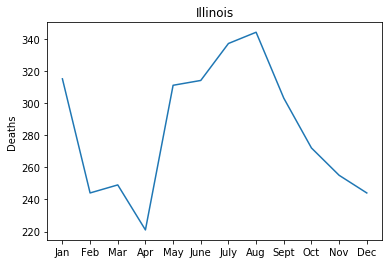

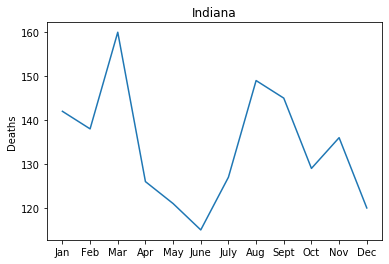

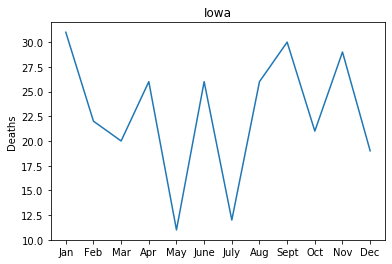

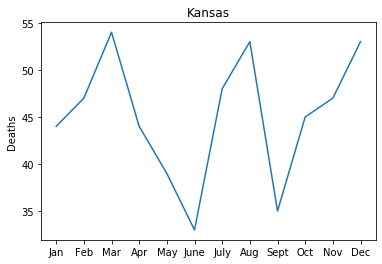

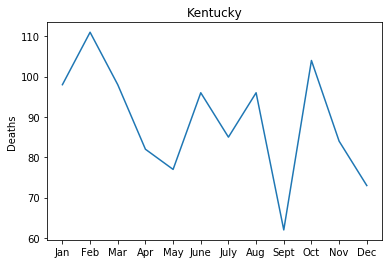

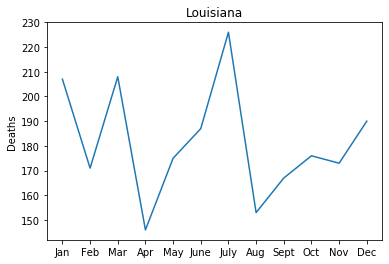

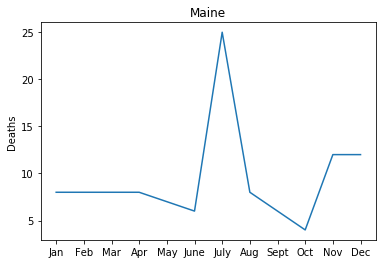

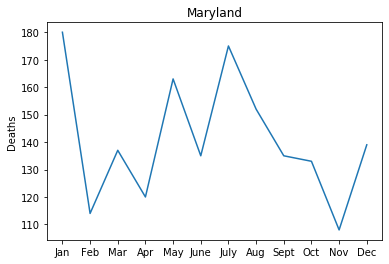

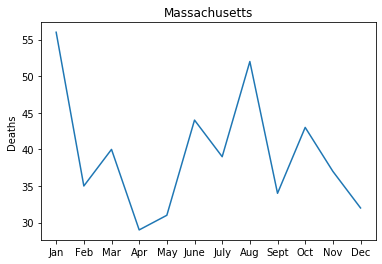

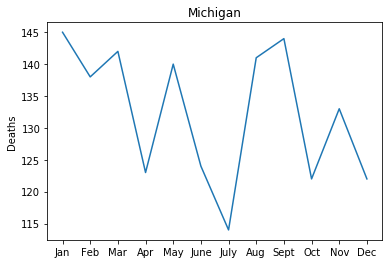

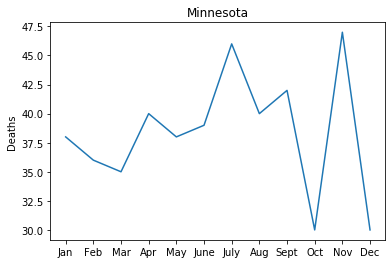

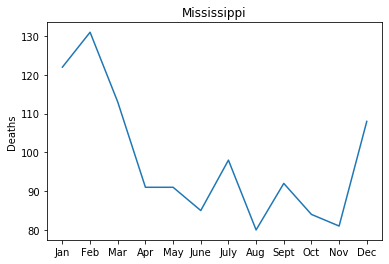

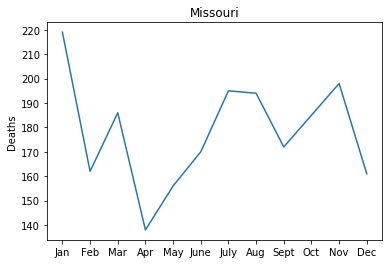

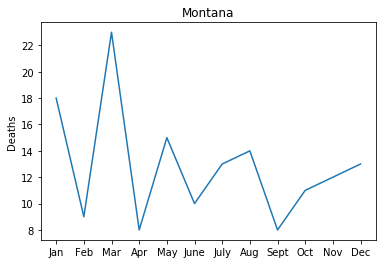

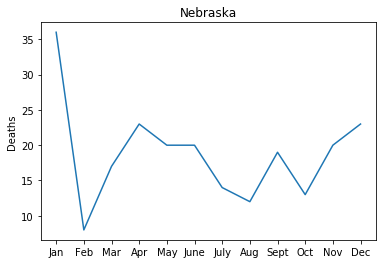

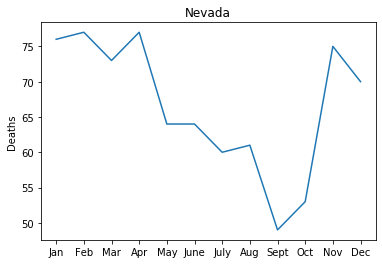

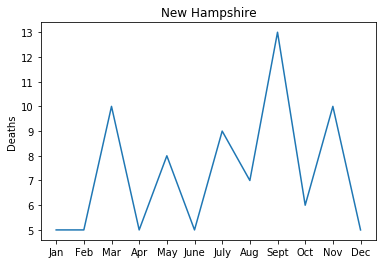

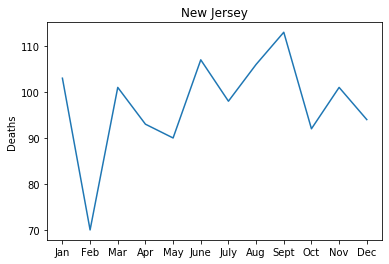

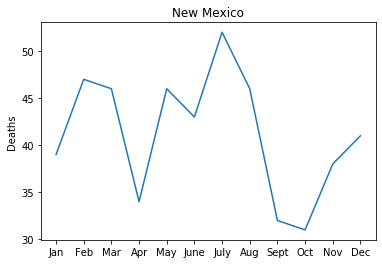

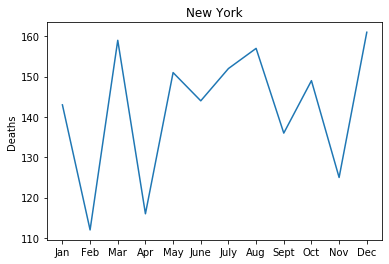

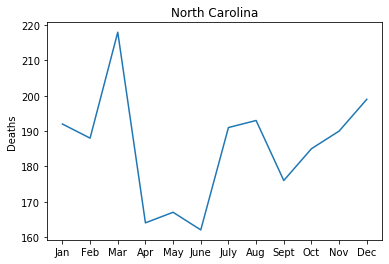

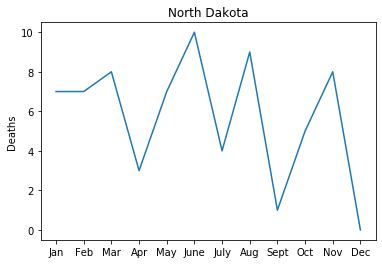

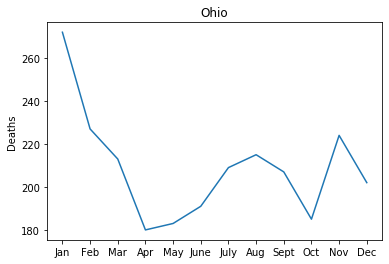

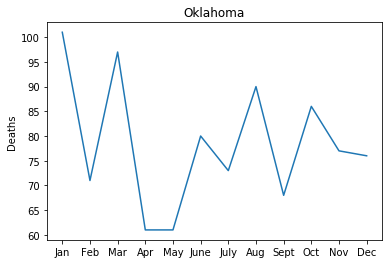

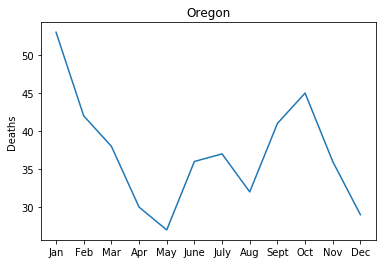

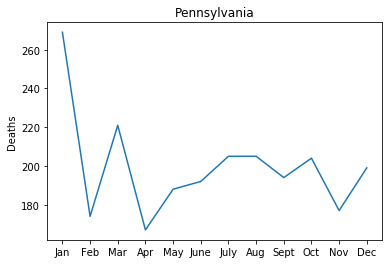

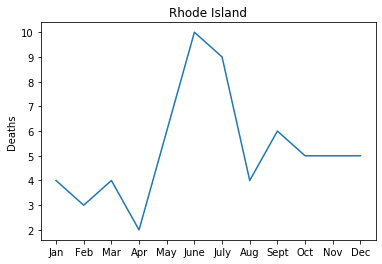

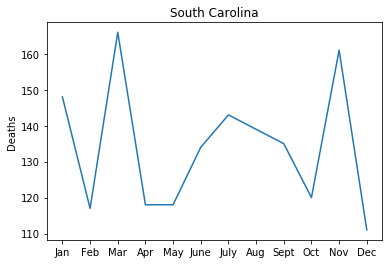

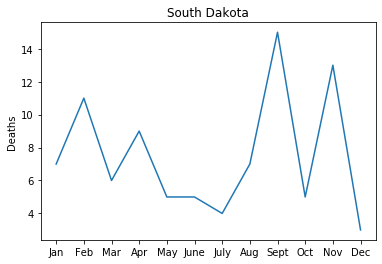

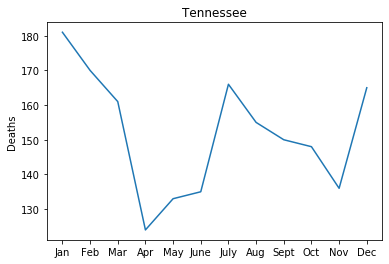

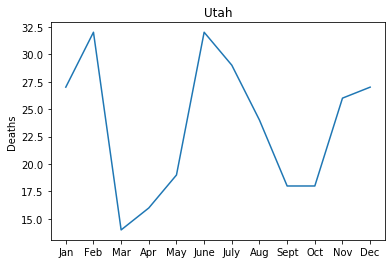

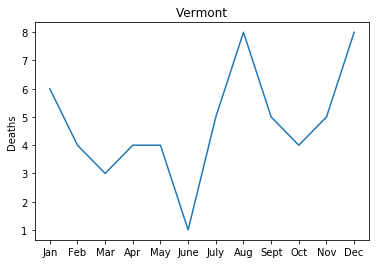

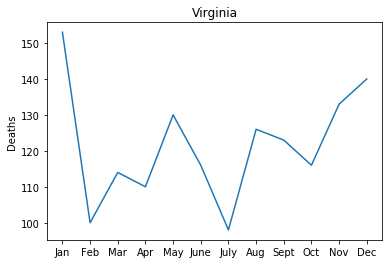

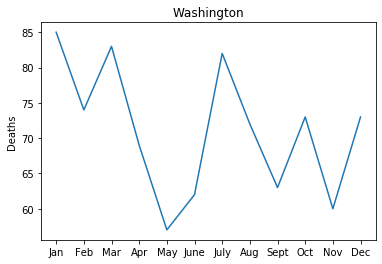

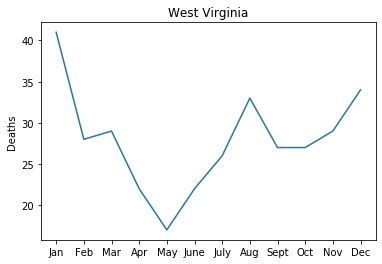

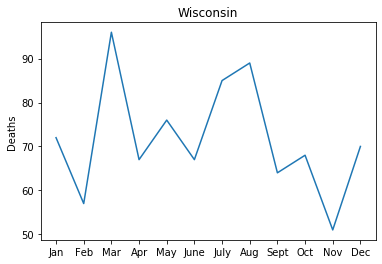

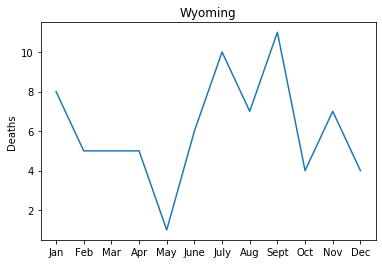

In [142]:
# order is the same as the list states
data_states_months = scan_months_states(states, state_names)

In [145]:
# a dicitonary per state per month
data_states_months

{'Texas': [550, 432, 544, 362, 418, 387, 411, 372, 379, 363, 396, 432],
 'Alabama': [209, 156, 189, 133, 146, 142, 153, 131, 151, 155, 162, 153],
 'Alaska': [27, 23, 28, 17, 28, 17, 28, 16, 25, 15, 17, 26],
 'Arizona': [103, 94, 101, 86, 95, 81, 93, 97, 78, 102, 78, 86],
 'Arkansas': [77, 65, 61, 54, 72, 52, 76, 67, 58, 71, 56, 64],
 'California': [552, 480, 546, 423, 461, 444, 467, 476, 417, 418, 435, 443],
 'Colorado': [91, 67, 69, 55, 67, 58, 71, 47, 56, 76, 88, 51],
 'Connecticut': [28, 17, 30, 25, 29, 30, 41, 39, 26, 25, 17, 34],
 'Delaware': [30, 23, 14, 22, 21, 19, 20, 14, 11, 10, 15, 18],
 'Florida': [429, 341, 409, 284, 306, 357, 341, 290, 277, 292, 272, 311],
 'Georgia': [218, 196, 221, 186, 179, 214, 212, 220, 191, 216, 199, 204],
 'Hawaii': [7, 5, 6, 3, 7, 6, 7, 4, 6, 5, 5, 2],
 'Idaho': [23, 16, 19, 7, 14, 17, 11, 17, 10, 8, 14, 10],
 'Illinois': [315, 244, 249, 221, 311, 314, 337, 344, 303, 272, 255, 244],
 'Indiana': [142, 138, 160, 126, 121, 115, 127, 149, 145, 129, 136

In [166]:
# if you want to get how many people killed in Texas January 2015, you call state_month_year_dict['Texas'][1][2015]
# to extract the values as a list, do state_month_year_dict['Texas'][1].values() for deaths in January 2013-2018 in Texas

state_month_year_dict = {}

for x in data:
    date = x[DATE]
    state = x[STATE]
    year, month, day = date.split('-')
    year = int(year)
    month = int(month)
    try:
        state_month_year_dict[state][month][year] += int(x[N_KILLED])
    except:
        if state not in state_month_year_dict:
            state_month_year_dict[state] = {month: {year: int(x[N_KILLED])}}
        elif month not in state_month_year_dict[state]:
            state_month_year_dict[state][month] = {year: int(x[N_KILLED])}
        elif year not in state_month_year_dict[state][month]:
            state_month_year_dict[state][month][year] = int(x[N_KILLED])
            
all_list = []
state_index = 0
lookup_table_state_index = {}
for state in state_month_year_dict:
    for month, month_deaths in state_month_year_dict[state].items():
        month_data = []
        for year in [2013, 2014, 2015, 2016, 2017, 2018]:
            if year in month_deaths:
                month_data.append(month_deaths[year])
            else:
                month_data.append(0)
        all_list.append([state_index, month] + month_data)
    lookup_table_state_index[state] = state_index
    state_index += 1

print('data by state and month: {}'.format(all_list))
print('lookup table: {}'.format(lookup_table_state_index))

data by state and month: [[0, 1, 0, 64, 47, 48, 53, 57], [0, 4, 2, 41, 28, 46, 50, 0], [0, 5, 0, 47, 58, 36, 47, 0], [0, 6, 0, 50, 31, 51, 60, 0], [0, 8, 5, 44, 38, 68, 50, 0], [0, 10, 4, 49, 48, 47, 56, 0], [0, 11, 0, 28, 42, 48, 59, 0], [0, 12, 2, 43, 58, 39, 57, 0], [0, 2, 0, 38, 33, 25, 39, 39], [0, 3, 0, 38, 37, 58, 48, 40], [0, 7, 0, 50, 40, 54, 61, 0], [0, 9, 0, 55, 48, 36, 55, 0], [1, 1, 1, 113, 111, 98, 115, 114], [1, 2, 6, 99, 76, 93, 102, 104], [1, 3, 8, 115, 108, 93, 136, 86], [1, 4, 1, 120, 93, 85, 124, 0], [1, 5, 5, 141, 94, 91, 130, 0], [1, 6, 11, 111, 81, 97, 144, 0], [1, 7, 3, 115, 108, 115, 126, 0], [1, 8, 3, 119, 82, 148, 124, 0], [1, 9, 4, 95, 122, 99, 97, 0], [1, 10, 2, 104, 102, 112, 98, 0], [1, 11, 1, 104, 107, 129, 94, 0], [1, 12, 1, 84, 120, 105, 133, 0], [2, 1, 2, 49, 35, 55, 67, 64], [2, 4, 4, 35, 39, 57, 45, 0], [2, 5, 0, 52, 43, 39, 49, 0], [2, 7, 0, 44, 53, 50, 62, 0], [2, 8, 0, 29, 55, 69, 62, 0], [2, 9, 0, 42, 51, 61, 53, 0], [2, 11, 1, 51, 50, 62, 60, 0

In [136]:
import random
# the index in list states
test_index = []
i = 0

while i < 5:
    test = random.randint(0, 49)
    if test not in test_index:
        test_index.append(test)
        i += 1

print("test index of states: ", test_index)
        
        
# training
training_index = []

for j in range(50):
    if j not in test_index:
        training_index.append(j)
        
print("training index of states: ", training_index)

test index of states:  [6, 18, 43, 7, 29]
training index of states:  [0, 1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49]


In [168]:
import csv

with open('kills_per_state_per_month.csv', mode='w') as out_file:
    writer = csv.writer(out_file, delimiter=',')
    for row in all_list:
        writer.writerow(row)

with open('lookup_table.csv', mode='w') as out_file:
    writer = csv.writer(out_file, delimiter=',')
    for state, state_index in lookup_table_state_index.items():
        writer.writerow([state, state_index])
